In [1]:
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Cell 2: Load the Data
df = pd.read_csv('data/cyanine.CSV')

# Display the first few rows
df.head()

,Wavelength (nm),Absorbance (AU),Std.Dev.
0,190,0.027664,0.033489
1,192,0.022690,0.033030
2,194,0.042526,0.034609
3,196,0.010101,0.037772
4,198,0.042526,0.045049


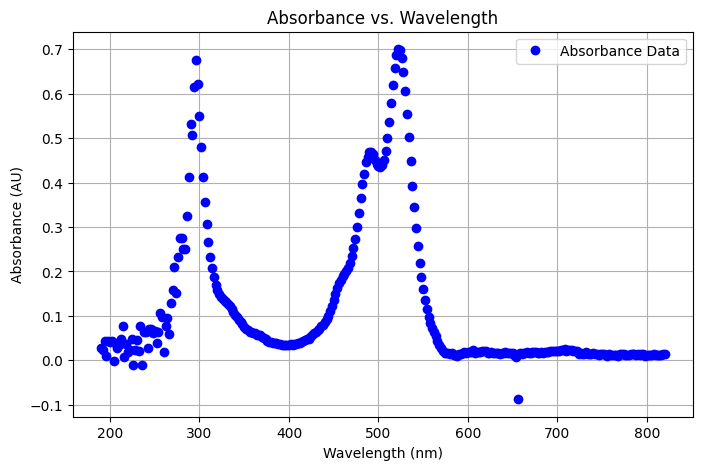

In [6]:
# Cell 3: Plot the Data
x = df['Wavelength (nm)'].values
y = df['Absorbance (AU)'].values

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'bo', label='Absorbance Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (AU)')
plt.title('Absorbance vs. Wavelength')
plt.legend()
plt.grid(True)
plt.show()

### Gaussian Function

$$
f(x) = A \cdot \exp\left(-\frac{(x - x_0)^2}{2\sigma^2}\right)
$$

- \( A \): Amplitude (peak height)
- \( x_0 \): Peak center
- \( \sigma \): Standard deviation (controls the width)

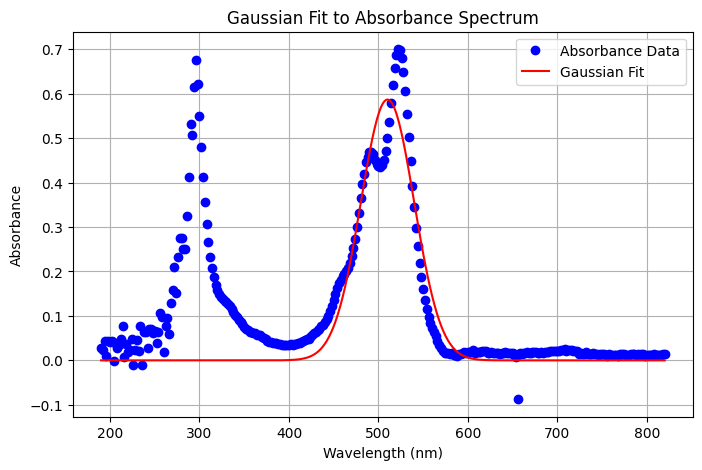

Fitted Gaussian parameters:
A = 0.587, x0 = 510.16 nm, sigma = 29.81 nm


In [8]:
# Cell 4: Define Gaussian Function and Fit
def gaussian(x, A, x0, sigma):
    return A * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

# Initial guess: [max height, center wavelength, width]
p0 = [max(y), x[np.argmax(y)], 10.0]

popt, pcov = curve_fit(gaussian, x, y, p0)

# Generate fitted curve
x_fit = np.linspace(min(x), max(x), 500)
y_fit = gaussian(x_fit, *popt)

# Plot the fit
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'bo', label='Absorbance Data')
plt.plot(x_fit, y_fit, 'r-', label='Gaussian Fit')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Gaussian Fit to Absorbance Spectrum')
plt.legend()
plt.grid(True)
plt.show()

# Output the parameters
print(f"Fitted Gaussian parameters:\nA = {popt[0]:.3f}, x0 = {popt[1]:.2f} nm, sigma = {popt[2]:.2f} nm")




### Lorentzian Function

$$
f(x) = \frac{A}{\pi} \cdot \frac{\gamma}{(x - x_0)^2 + \gamma^2}
$$

- \( A \): Total area under the peak
- \( x_0 \): Peak center
- \( \gamma \): Half-width at half-maximum (HWHM)


# Exercise: Fit the Data to a Lorentzian Curve

Your turn!

1. Define a Lorentzian function in Python.
2. Use `curve_fit` to fit the absorbance data.
3. Plot the Lorentzian fit over the data.
4. Print the fitted parameters.

_Hint_: Use the Gaussian example as a template, and start with an initial guess like `[area, center, HWHM]`.
